# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


/Users/lucasosouza/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lucasosouza/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# new note: switched from pandas to numpy as per reviewer's request

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
* RM: an increase in the average number of rooms will probably lead to an increase in prices, hence an increase in RM leads to an increase in MDEV.
* LSTAT: this feature encodes the relative 'status' position of the neighborhood in relation to other neighborhoods. If LSTAT increases, there will be more Boston homeowners who have a greater net worth than homeowners in the neighbords, and therefore the house price will be lower (if LSTAT increases, MDEV decreases).
* PTRATIO: this feature is a proxy to the quality of education in the schools in the neighborhod. A higher ratio of students to teachers means a better education, which makes the house price higher. So if PTRATIO increases, MDEV increases as well.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
Yes, the model successfully captures the variation of the target variable. R^2 equals 0.923, which means the model can explain 92% of the variability in the data, which is a very good R^2 score. Manually inspecting the values we can also see the predicted value are close to the true values.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# set random state and test size
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    random_state=42, test_size=.2)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
Separating a set for testing is import to assess the performance of your model. When training a classifier or a regressor we want to ensure it is able to generalize to new data. Therefore, it is important the model is tested in data which is not used to train the learning algorithm. 

Optimizing the choice of algorithm, parameters and features based on performance measured in training data incurs the risk of overfitting the model to the training set. Adjusting to the nuances of the training set will make the model perform worst on new data, which is exactly what we want to avoid.
______
*Side note: it is important to highlight there is also a risk to overfit to the testing set. Hence, it is a good practice to have three separate sets: a training set, a validation set, which will be used to validate the performance of the different models, and a testing set, which is only used to report the results of the final model.*

*To avoid the need of having a separate validation set, we can use a cross-validation strategy, which we will get into details later on.*

*References on [scikit-learn](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).*

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

/Users/lucasosouza/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


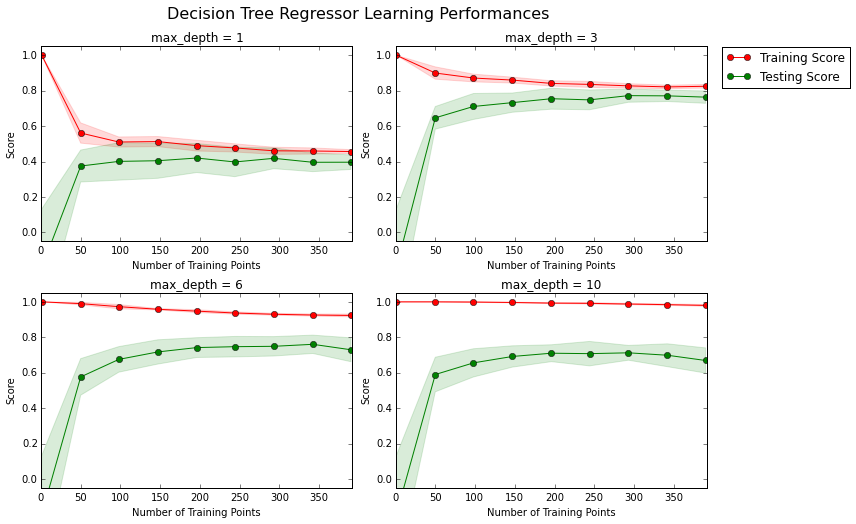

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
Max_depth 3 is the ideal case we are looking for, where the gap between the learning curves from training score and testing is minimized. That means the performance measured in the training set will generalize to new data, which is the behavior we are looking for when creating a predictor.

More data reduces overfitting, and improves the performance in the testing set while reducing the performance in the training set, as expected. But there is a point, where the gap between the curves is minimized, when adding more data will not increase the model performance. This plot shows the optimal number of training points is around 300.
____
*additional info requested *

**Be sure to describe how each of the curves (training and testing) for your chosen model behave as more training data is added. Are they increasing? decreasing?**

As more training data is added, the performance on the training set increases, while performance on the test set decreases, as expected. At around n=300, both curves plateau. 

**Do the training and testing curves level off or converge at some point? What is the R^2 score (approximately) where the curve(s) converge? How much training data?**

The curves converge at around n=300, where R^2 equals 0.81 for the training set and 0.79 for the testing set (it is hard to tell with the the y-ticks defined with a 0.2 interval, I'm just guessing the values from the visualization). 
 
**Be sure to clarify whether you'd expect adding more data would be useful.**

As explained above, "But there is a point, where the gap between the curves is minimized, when adding more data will not increase the model performance". So the point where the gap between is minimized, around n=300, is the optimal point. Solely adding more observations will not increase the model.

However, "adding more data" has a double meaning here. It could mean more observations, which will not be useful per see, or it could also mean more variables. Adding more features could increase R^2. In this case, more variables should also be followed by more observations, to avoid the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

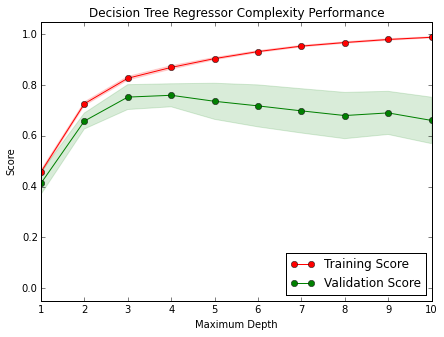

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
When the model is trained with a maximum depth of 1, is not complex enough to capture the underlying pattern in the data (high bias). That is clear from the visualization which shows that as the maximum depth increases, the validation score increases as well.

When it reaches maximum depth 4, the validation score plateaus, and starts to decrease. At this point, making the model more complex increases its variance, resulting in what we call an overfitted model (high variance). An overfitted model is fitted to the training set and does not generalize well to new data. 
_____
*additional info requested *

**Please be sure to justify this by what you see on the max_depth=1 graph up above (top left). What does the relationship between the training curve and the testing curve tell you? What about the R^2 scores for these two curves?**

In max_depth=1 plot, the curves converge at around R^2=0.45 (say 0.47 for the training, and 0.43 for the testing curve, but again I'm just guessing from the visualization). They approximate when n=200 but the minimum gap is around n=300. The low R^2 score indicates the model is not complex enough to explain the variance in the data, which means the model suffers from high bias. 

Adding more observations from this point will not increase the performance score. We need to look at alternatives of improving the complexity of our model to capture the pattern.

**Please be sure to explain what you see on the max_depth=10 graph that indicates if the model is suffering from high variance (Same as above, look at the relationship between the training/testing curves and the R^2 scores). Ideally, your answer should be specific enough that someone who hasn't done this kind of analysis before would be able to reproduce your results.**

On the other hand, at the max_depth=10 plot, we have the opposite scenario. The curves never converge. The model is too complex and overfits to the training set, which makes it harder to generalize to new data. The Rˆ2 score in the training set is close to 1 even when n=300, it decreases slowly as the observations increase.

For the testing set, R^2 score stabilizes at around 0.68, where n= 200. At this point, adding more data will not improve the performance of the model. We need to look at alternative of simplifying our model to fit to the signal and not to the noise in the training set.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
The ideal maximum depth is around 4, as discussed in the answers above. The intuition is that validation score curve plateaus and starts to decrease from this point.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
A grid search techinique is a way of attempting to train the model with different sets of parameters, to find the optimal choice of parameters for the algorithm, a practice also referred to as parameter tuning.

For each set of parameters, the model is validated by using a cross-validation strategy, specified in details below. The grid search returns the best choice of parameters for the model.

Additionally, the scikit-learn implementation of grid_search also allows the user to optimize the parameters of feature transformation algorithms, such as imputers, scalers and feature selectors, by using a combined approach of pipeline and grid search. Example can be found [here](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#example-model-selection-grid-search-text-feature-extraction-py) and in this nice [blog post](https://civisanalytics.com/blog/data-science/2016/01/06/workflows-python-using-pipeline-gridsearchcv-for-compact-code/) by Udacity's own Katie Malone.
_____
*additional info requested *

**How are the parameters evaluated? One at a time? All at once? Each possible combination (outer product) one at a time? All at once?**

Each possible combination is evaluated, one at a time, using a cross-validation strategy. It is also called an "exhaustive grid search". That means for each combination of parameters it trains and validates the algorithm k times, where k equals the number of folds, and reports the average of the values computed in the loop as the performance of that combination.

These details refer to scikit-learn grid search implementation. It would also be possible to manually create a function to perform a grid search on a held out validation set. This is not advisable as the model could overfit to the validation set. I've discussed this in the notes.

I would also note scikit-learn implements another type of search, RandomizedSearchCV, that does not test all combinations, but rather "sample a given number of candidates from a parameter space with a specified distribution."(from the docs). Randomized search is very useful to apply in real world scenarios, where the dataset is big and it would take too long to run a complete grid search.

**Also, how does the grid search know which parameters are 'best'? (explain the scorer function here)**

As mentioned above, for each combination, grid seach performs a validation on k-folds, through a cross-validation strategy, and reports the average of the performance values computed in the loop as the performance of that combination.

The performance metric used by grid search can be defined by the user by setting the parameter `scoring`. If it is not defined, it falls back to the default, which is the default score method of the estimator used. The default score method in scikit-learn is usually accuracy for classifiers and Rˆ2 score for regressors.

In this project, for instance, it does not make a difference defining the scoring function equal to performance_metric function, which returns Rˆ2 score, since Rˆ2 is already the default scoring function for the DecisionTreeRegressor.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique and how is it performed on a learning algorithm?*

**Answer: **
Ideally, you should separate a part of the dataset only to test in the final algorithm, and split the remaining into a learning set and validation set. A validation set is important because there is a risk in overfitting when you use the the test data to choose the most appropriate model or perform hyperparameter tuning, since there is a leakage of test data information into the model.

But training on a smaller set of the data can reduce the algorithm's performance. To avoid discarding relevant observations, and stay clear from overfitting, there are several strategies of cross-validation which dismiss the need for a validation set.

In cross-validation, the training dataset is split into k folds. The prediction function is learned using k - 1 folds, and the fold left out is used for test. This is repeated multiple times, for each fold, and the performance measure reported is the average of the values computed in the loop. 

The exact strategy will vary depending on the cross-validation method used. The method described above is the k-fold, which is a basic strategy of cross-validation. Other strategies including using a stratified approach, that preserves the distribution of label classes in each fold, and is ideal for highly unbalanced data, and shuffling the elements before breaking down into folds. We can implement shuffle in k-fold by setting the parameter `shuffle=True`.

[Scikit-learn docs on cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

[About training, validation and test datasets](http://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set)

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Prints the best score
    print "Best score: {0:.2f}".format(grid.best_score_)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

/Users/lucasosouza/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Best score: 0.76
Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
Maximum depth selected by grid search is 4, which is equal to the optimal value derived from analysis of the learning curves. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    print "z-score: {0:.2f}".format((price-mean_price)/std_price)

Predicted selling price for Client 1's home: $344,400.00
z-score: -0.67
Predicted selling price for Client 2's home: $237,478.72
z-score: -1.31
Predicted selling price for Client 3's home: $931,636.36
z-score: 2.89


**Answer: **
The values seem reasonable, given the measures of centrality and variability of prices. The values are within the min and max range, and have a z-score within expected boundaries. Client 3 clearly distinguishes from client 1 and 2, given the house has 8 rooms, is located in a neighborhod in the top 7th percent of household income and which has the best student-teacher ratio amongst the three. The differences are reflected on the price.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Best score: 0.77
Trial 1: $324,240.00
Best score: 0.78
Trial 2: $324,450.00
Best score: 0.73
Trial 3: $346,500.00
Best score: 0.74
Trial 4: $420,622.22
Best score: 0.75
Trial 5: $302,400.00
Best score: 0.73
Trial 6: $411,931.58
Best score: 0.81
Trial 7: $344,750.00
Best score: 0.78
Trial 8: $407,232.00
Best score: 0.72
Trial 9: $352,315.38
Best score: 0.82
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
The model has a high variance, as shown in the results above where the model is trained with different training/test sets, and is not robust enough to make consistent predictions. 

The best performing has a reasonable R2 score, of 0.78, but as the visualization shows the predictions are not good enough to use in a real world scenario (just as an aid, but certainly not as the final word). The performance plateaus with n=300, so increasing the number of features could increase the performance, given that we also increase the amount of training data (currently X_train equals 336). The amount of training data required grows exponentially with the number of features ([curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)). 

Although the feature MDEV have been scaled to adjust for inflation in the past 35 years, there are still conjunctural macroeconomic factors that can impact house prices change besides inflation, such as changes in people's preferences, better or worst incentives to buy houses, changes in Boston's population characteristics and its economy, and others.

The model is also not extendable to different scenarios, such as rural cities, as the features used have a different importance in rural areas. For example, student-teacher ratio may not be so relevant in rural areas, while the amount of surrounding productive area could be an important feature.

In summary, the model, as it is, should not be applied to real-world settings.


:0: FutureWarning: IPython widgets are experimental and may change in the future.


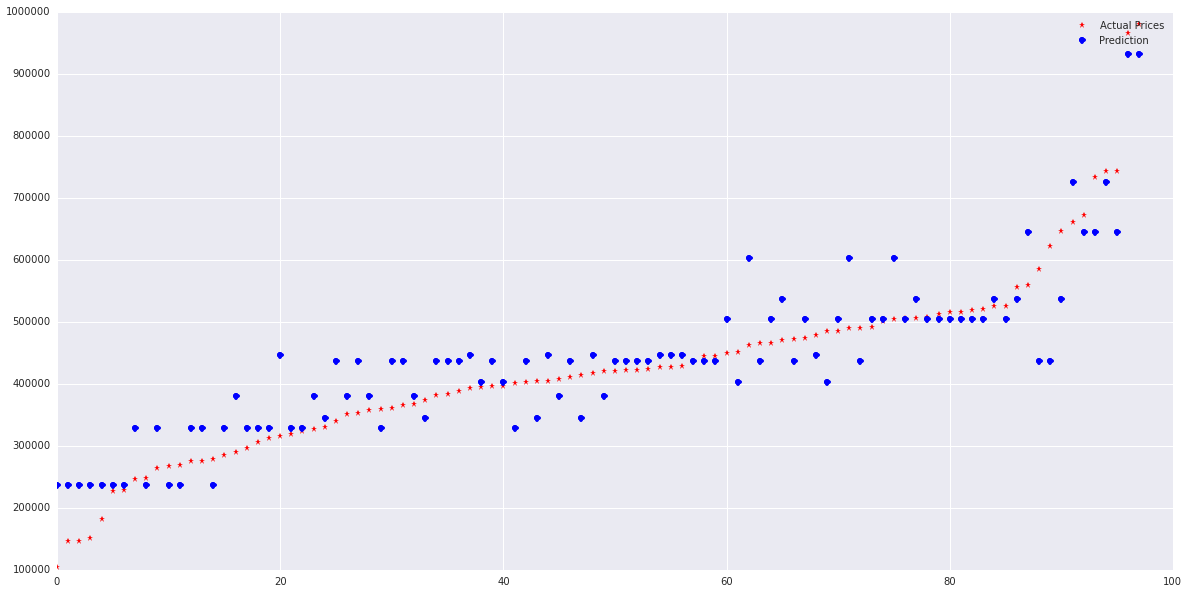

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# sort
y_test_sorted = y_test.sort_values()
X_test_sorted = X_test.reindex(y_test_sorted.index)

# predict and plot
y_pred = reg.predict(X_test_sorted)
line1, = plt.plot(y_test_sorted, 'r*', label="Actual Prices")
line2, = plt.plot(y_pred, 'bo', label="Prediction")
plt.legend(handles=[line1, line2]);
